In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../cs-training.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.dropna(inplace=True)

In [4]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
data = df.to_numpy()
data

array([[ 1.        ,  0.76612661, 45.        , ...,  6.        ,
         0.        ,  2.        ],
       [ 0.        ,  0.95715102, 40.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.65818014, 38.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.29974515, 44.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 0.        ,  0.        , 30.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.85028295, 64.        , ...,  2.        ,
         0.        ,  0.        ]])

In [6]:
X, y = data[:,1:], data[:,0]

### Run SMOTE then use the output in rf pipeline

In [7]:
%run smote.ipynb
# PRODUCES: X_res, Y_res

In [8]:
# We use X_res and Y_res from SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

In [9]:
# Grid search Cross Validation
params = {
      "n_estimators":[i for i in range(50,150,10)]
}
cv = GridSearchCV(
       estimator=RandomForestClassifier(n_jobs=-1),
       param_grid=params,
       n_jobs=-1,
       cv=5,
       verbose=1
)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140]},
             verbose=1)

In [10]:
res = pd.DataFrame(cv.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,29.790079,3.755873,5.180475,2.835767,50,{'n_estimators': 50},0.968921,0.970028,0.968690,0.970439,0.969693,0.969554,0.000659,9
1,32.507402,3.618212,3.641132,2.604894,60,{'n_estimators': 60},0.968844,0.970594,0.968098,0.970233,0.969616,0.969477,0.000910,10
2,35.100701,1.220953,8.548631,3.074197,70,{'n_estimators': 70},0.969410,0.970439,0.969410,0.971057,0.969745,0.970012,0.000643,8
3,44.102567,3.453446,5.659720,2.012996,80,{'n_estimators': 80},0.969745,0.970465,0.969179,0.970902,0.969950,0.970048,0.000593,7
4,48.279727,1.596947,8.690200,2.743540,90,{'n_estimators': 90},0.969230,0.970413,0.969642,0.971288,0.969745,0.970064,0.000721,6
5,55.646825,3.279755,9.447495,2.287787,100,{'n_estimators': 100},0.969642,0.970902,0.969642,0.971391,0.969873,0.970290,0.000721,3
6,62.746129,1.476745,8.647371,0.769624,110,{'n_estimators': 110},0.969539,0.970696,0.969281,0.970979,0.970362,0.970172,0.000657,4
7,65.602063,1.256422,12.183979,0.608297,120,{'n_estimators': 120},0.969693,0.970696,0.969899,0.971288,0.970182,0.970352,0.000577,2
8,72.895314,0.646990,7.766961,0.502573,130,{'n_estimators': 130},0.969745,0.970311,0.969667,0.971134,0.970002,0.970172,0.000531,4
9,55.535363,17.082251,1.562509,1.070460,140,{'n_estimators': 140},0.970156,0.970722,0.969513,0.971545,0.970568,0.970501,0.000669,1


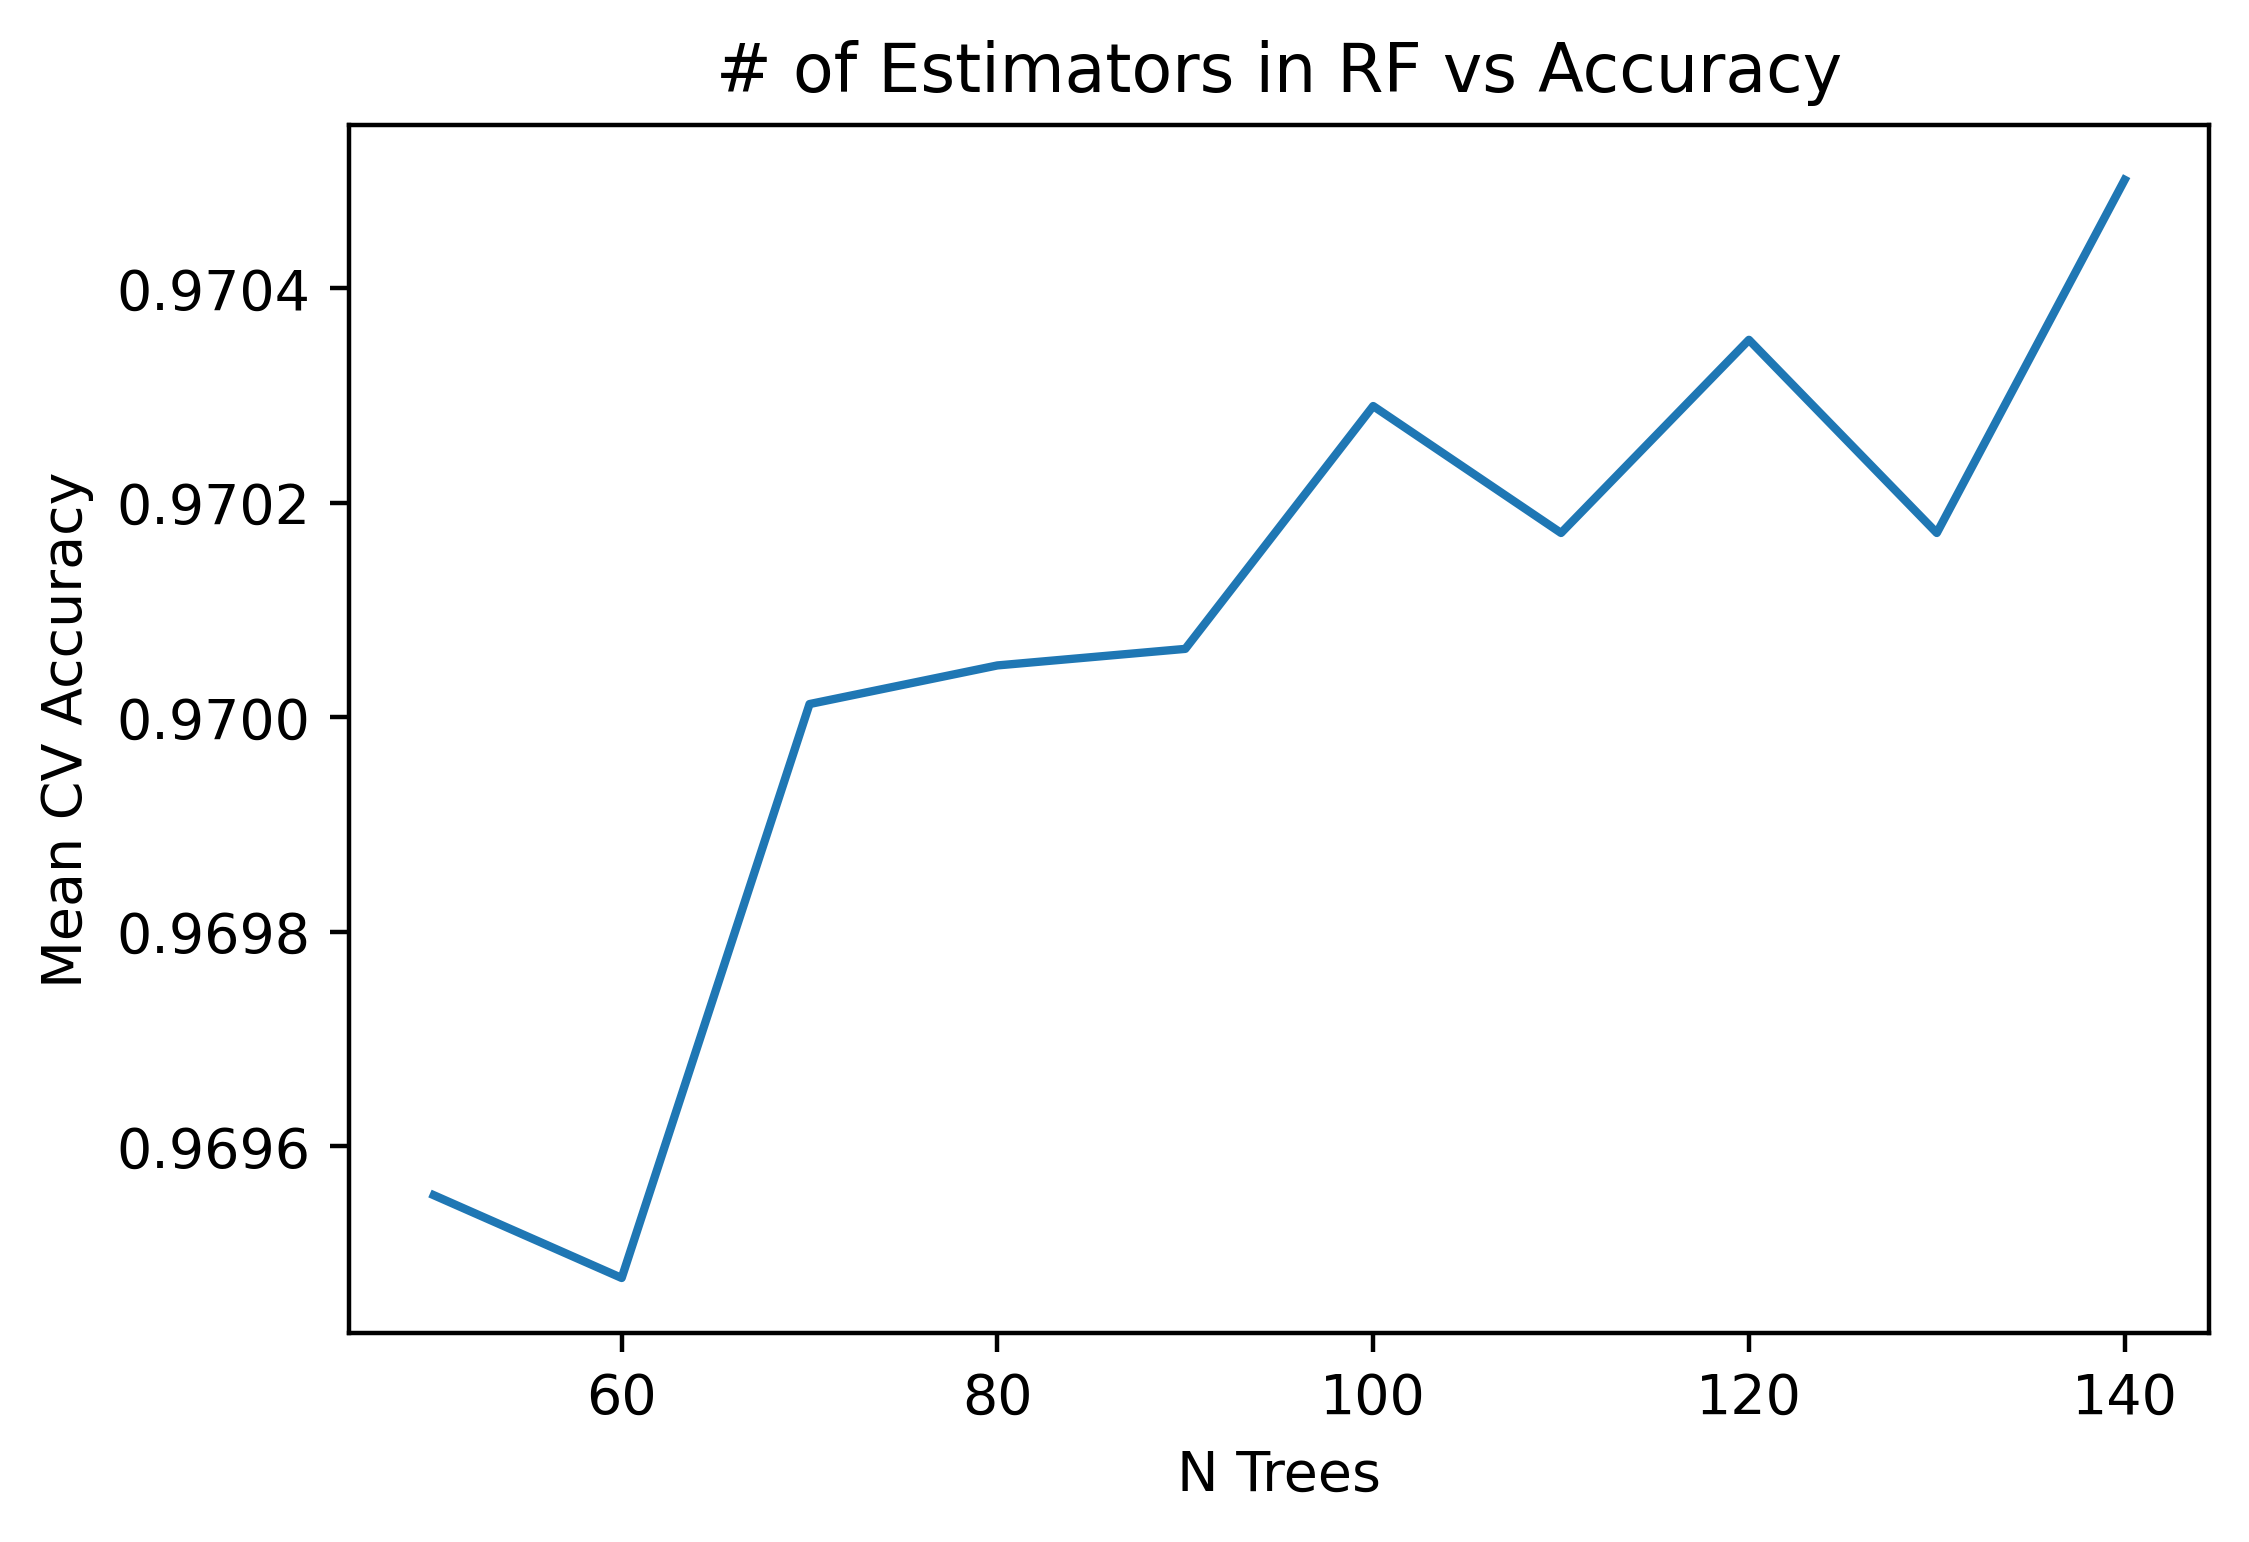

In [11]:
plt.figure(dpi=400) # sets resolution of plot
ax = sns.lineplot(
       data=res,
       x="param_n_estimators",
       y="mean_test_score",
       palette="magma"
)

ax.set(xlabel='N Trees', ylabel='Mean CV Accuracy', title="# of Estimators in RF vs Accuracy")

plt.show()

In [12]:
rf = cv.best_estimator_
print(f"Best CV Score -> {cv.best_score_}")
print("Best Parameters")
for param, val in cv.best_params_.items():
       print(f"{param} -> {val}")

Best CV Score -> 0.970500913324243
Best Parameters
n_estimators -> 140


We can also see variable importance!

In [13]:
print("Feature Importances\n")
for index, column in enumerate(df.columns[1:]):
       print(f"{column:>36s} -> {rf.feature_importances_[index]*100:.2f}%")

Feature Importances

                    SeriousDlqin2yrs -> 4.28%
RevolvingUtilizationOfUnsecuredLines -> 18.30%
                                 age -> 5.95%
NumberOfTime30-59DaysPastDueNotWorse -> 20.42%
                           DebtRatio -> 4.74%
                       MonthlyIncome -> 4.82%
     NumberOfOpenCreditLinesAndLoans -> 4.85%
             NumberOfTimes90DaysLate -> 7.22%
        NumberRealEstateLoansOrLines -> 11.94%
NumberOfTime60-89DaysPastDueNotWorse -> 3.81%
                  NumberOfDependents -> 13.68%


Predict using test set and determine accuracy

In [14]:
pred = rf.predict(X_test)
accuracy = sum(pred==y_test)/len(y_test)
print(f"Accuracy -> {accuracy*100}%")

Accuracy -> 97.22147899643939%


But.. Accuracy isn't enough! Now, for evaluation metrics...
- Confusion Matrix
- Precision, Recall, F1
- AUROC

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, RocCurveDisplay

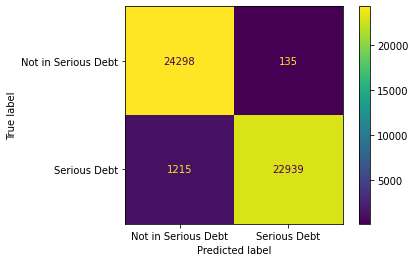

In [16]:
# Confusion Matrix
conf_m = ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["Not in Serious Debt", "Serious Debt"])

In [17]:
# Precision, Recall, and F-1
print(f"Precision -> {precision_score(y_test, pred)}")
print(f"Recall -> {recall_score(y_test, pred)}")
print(f"F-1 -> {f1_score(y_test, pred)}")

Precision -> 0.9941492589061282
Recall -> 0.949697772625652
F-1 -> 0.9714152621326332


Here, even thouh the accuracy is high, the precision and recall scores are quite low. This is likely because there are so many more 0's than 1's, that the random forest will find it better to maximize accuracy by just selecting 0 (because its more likely). It is clear from the precision that only 53% of the predictions for "serious in debt" are correct. It is clear from the recall that only 17% of people serious in debt were correctly identified by the model. Accuracy of 93% is very misleading here, and the precision, recall and f1 metrics illustrate this nicely. 

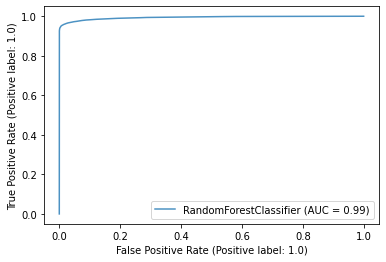

In [18]:
# ROC and AUC-ROC
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, alpha=0.8)

This ROC curve looks OK, but not the greatest.

# Testing

In [88]:
# sry for some reason relative path was not working on my pc
test = pd.read_csv("C:\Documents_Austin\Fall 2022\Math 154\GroupProject\gabeKaggle\cs-test.csv")

In [89]:
test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [90]:
# drop classification target
test = test.drop("SeriousDlqin2yrs", axis=1)

In [91]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# iterative impute missing data

imp_mean = IterativeImputer(random_state=0)
test_imp = imp_mean.fit_transform(test)




In [105]:
# predict probabilities instead of 1's and 0's for Kaggle. Note Kaggle probability is supposed to be probability of "1"
pred = rf.predict_proba(test_imp)
len(pred)

temp = pd.DataFrame(pred)
temp = temp.drop(0, axis=1) #drop irrelevant probability 
temp = temp.reset_index(level=0) #for "Id" column
temp.columns = ["Id", "Probability"] #name columns
temp["Id"] += 1 #"Id" column is 1-indexed


c:\Users\austi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [106]:
temp

,Id,Probability
0,1,0.042857
1,2,0.257143
2,3,0.071429
3,4,0.128571
4,5,0.250000
...,...,...
101498,101499,0.185714
101499,101500,0.342857
101500,101501,0.150000
101501,101502,0.135714


In [107]:
temp.to_csv("SMOTEd.csv", index=False)